# Influence asteroid visualizations

This is a simple notebook showcasing some interesting statistics for the asteroids available in the Influence game.
We'll inspect the owned asteroid group, the unowned one and the full group.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_json('2021-09-05-adalia-info-asteroids.json', lines=True)


In [61]:
# Inspect initial shape of dataframe
print(f'Rows/Columns: {df.shape}')
print(df.isnull().sum())

# Split asteroids based on ownership status
unowned_df, owned_df = df[df['owner'].isnull()], df[df['owner'].notnull()]
print(unowned_df.shape, owned_df.shape)

Rows/Columns: (250000, 17)
_id                    0
id                     0
baseName               0
bonuses                0
eccentricity           0
estimatedPrice      1860
inclination            0
name                   0
orbitalPeriod          0
owner             248140
radius                 0
rarity            248633
scanned                0
semiMajorAxis          0
size                   0
spectralType           0
surfaceArea            0
dtype: int64
(248140, 17) (1860, 17)


We can see that at the early access sale, 1860 asteroids have been sold already, a mere fraction of the total supply of
asteroids.

<AxesSubplot:title={'center':'Asteroids spectral type distribution'}>

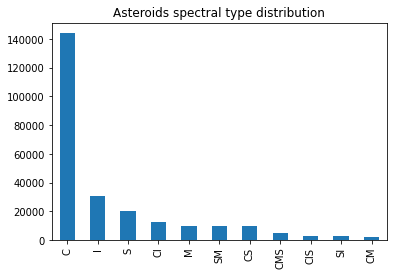

In [62]:
# Illustrate spectral type distribution
df['spectralType'].value_counts().plot(kind='bar', title="Asteroids spectral type distribution")

Clear from this barchart is that there is an overwhelming majority of C type asteroids, this is already known though if
you ever read the [wiki page](https://wiki.influenceth.io/en/gameplay/spectral-types) on spectral types. But what about
the currently sold asteroids?

<AxesSubplot:title={'center':'Owned asteroids spectral type distribution'}>

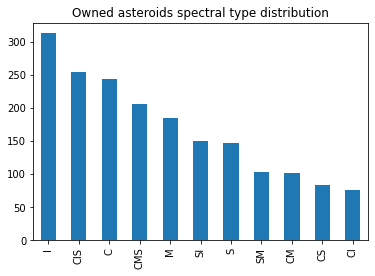

In [63]:
# Illustrate spectral type distribution
owned_df['spectralType'].value_counts().plot(kind='bar', title="Owned asteroids spectral type distribution")

Now this chart shows that the early access investors have a large preference for the pure types and the triple types,
with few being interested in the double types. Specifically I types are very hot!


<AxesSubplot:title={'center':'Asteroids size distribution'}>

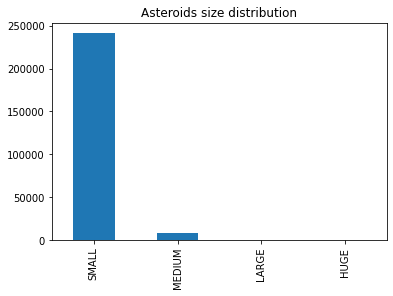

In [64]:
# Illustrate size distribution
df['size'].value_counts().plot(kind='bar', title="Asteroids size distribution")

<AxesSubplot:title={'center':'Asteroids size distribution'}>

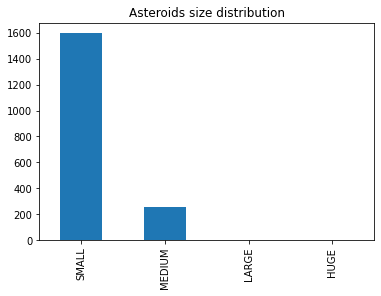

In [65]:
# Illustrate size distribution
owned_df['size'].value_counts().plot(kind='bar', title="Asteroids size distribution")

Most of the asteroids are small, with medium coming in second, and large and huge being very low in supply. Players
purchased EA asteroids in mostly the same distribution, which makes sense seeing as the large and huge asteroids are
very pricey. How pricey you ask?

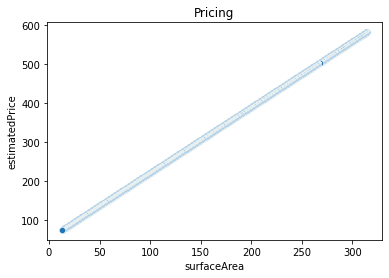

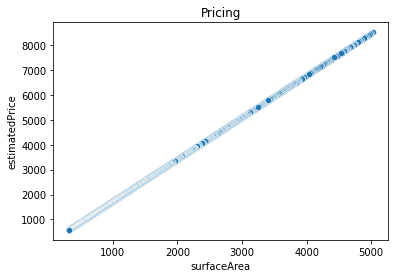

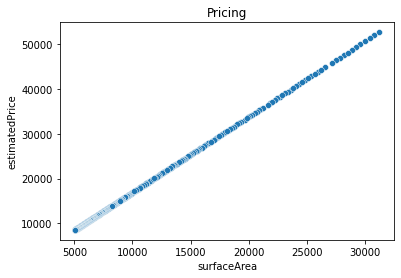

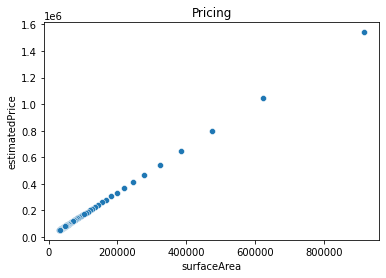

In [71]:
#  Illustrate size distribution
unowned_df_by_size = reversed([d for _, d in unowned_df.groupby(['size'])])
for df in unowned_df_by_size:
    sns.scatterplot(x=df['surfaceArea'], y=df['estimatedPrice'])
    plt.title('Pricing')
    plt.show()

The answer is very pricey, the huge asteroids have costs ranging in the hundreds of thousands. Additionally, you can
see that the price and size increase linearly, which shouldn't be a surprise